<p style="text-align: center;"><span style="color: #ff0000;"><strong><span style="font-size: x-large;">
    ANEXO II: USO DE LA LIBRERIA LATTPY</span></strong></span></p>

<p style="text-align: center;"><span style="color: black;"><strong><span style="font-size: x-large;">Realizado por:</span></strong></span></p>
<p style="text-align: center;"><span style="color: black;"><strong><span style="font-size: x-large;">Gabriel Vacaro Goytia</span></strong></span></p>
<p style="text-align: center;"><span style="color: black;"><strong><span style="font-size: x-large;">Ignacio Warleta Murcia</span></strong></span></p>

En este anexo, profundizaremos en el concepto de retículo, abordando tanto su definición teórica como su implementación práctica utilizando la poderosa librería LattPy. Esta herramienta permite no solo visualizar y manipular retículos de manera eficiente, sino también explorar sus propiedades matemáticas, estructurales y geométricas en diversos contextos.

LattPy se destaca por su facilidad de uso y flexibilidad, lo que la convierte en una opción ideal tanto para principiantes que buscan comprender los fundamentos de los retículos, como para investigadores expertos. En este anexo, se presentarán ejemplos prácticos que ilustran cómo definir distintos tipos de retículos, modificar sus características y analizar propiedades como la periodicidad, las distancias entre nodos y las conexiones entre ellos.

Organizamos el anexo según el siguiente índice:

# Índice

1. Introducción
2. Configuración
3. Implementación


---
# 1. Introducción

Como se ha explicado en el documento, un retículo (*lattice* o celosía), $L$, se trata de una estructura algebraica compuesta por un conjunto de puntos en un espacio, donde cada punto puede ser descrito como una combinación lineal de vectores base con coeficientes enteros. Estos puntos están organizados de manera regular y se extienden infinitamente en todas las direcciones, formando una red de puntos que se repite periódicamente.

Es decir, dada una base de vectores $B= \{b_1, \dots, b_m\}$, un retículo $L$ es un subespacio vectorial formado por las combinaciones lineales enteras de los elementos de la base $b_i$:

$$
L = \left\{ \sum_{i=1}^m a_i \cdot b_i : a_i \in \mathbb{Z} \right\} = \{ B \cdot a : a \in \mathbb{Z} \}.
$$

El conjunto $B = \{b_1, \dots, b_m\}$ se denomina base del retículo. El retículo generado por la base $B$ se denota por $L(B)$.



---

# 2. Configuración

Para comenzar a trabajar con LattPy, es necesario ejecutar la celda que aparece a continuación. Esta celda contiene los comandos necesarios para importar los módulos y bibliotecas requeridos por el código, asegurando así que todas las funcionalidades de LattPy estén disponibles y operen correctamente. 

In [1]:
#MODULOS A IMPORTAR
import numpy as np
import lattpy as lp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from itertools import product
import time  # Importar time para medir el tiempo

A continuación, se definen funciones que utilizaremos a lo largo del documento:

- Crear átomos únicos con coordenadas aleatorias
- Generar puntos de un retículo basado en una matriz base y un rango de enteros
- Encontrar el vector más cercano a un punto objetivo en el retículo
- Calcular el vector más corto entre todos los puntos del retículo

In [2]:
#FUNCIONES UTILIZADAS

def crear_atomos(latt, num_atoms, dimensiones=7):
    """
    Crea átomos en la red con posiciones aleatorias y únicas.
    
    Parámetros:
    latt: objeto de la red donde se agregarán los átomos.
    num_atoms: número de átomos a crear.
    dimensiones: número de dimensiones del espacio (por defecto 7).

    Retorna:
    None
    """
    # Crear un conjunto para asegurarnos de que las posiciones sean únicas
    posiciones_generadas = set()

    while len(posiciones_generadas) < num_atoms:
        # Generar coordenadas aleatorias en [0, 1] para todas las dimensiones
        coords = tuple(np.random.rand(dimensiones))  # np.random.rand genera valores en [0, 1)
        posiciones_generadas.add(coords)  # Añadir a un conjunto asegura unicidad

    # Agregar átomos únicos a la red
    for i, coords in enumerate(posiciones_generadas):
        nombre = f"Atom_{i + 1}"  # Nombra los átomos de forma automática
        latt.add_atom(list(coords), nombre)

# Función para generar los puntos del retículo
def generar_puntos_reticulo(base, limite):
    """
    Genera todos los puntos del retículo dados los vectores base y un límite de los enteros.

    base: matriz de base (n x n) que genera el retículo.
    limite: rango de los valores enteros para las combinaciones.

    Retorna un arreglo con todos los puntos del retículo.
    """
    # Generamos todas las combinaciones posibles de los enteros para k1, k2, ..., kn
    posibles_k = list(product(range(-limite, limite + 1), repeat=base.shape[0]))

    # Generamos los puntos del retículo como combinaciones lineales de los vectores base
    puntos_reticulo = []
    for k in posibles_k:
        punto = sum(k[i] * base[i] for i in range(len(k)))
        puntos_reticulo.append(punto)
    
    return np.array(puntos_reticulo)



#Funcion para calcular el vector mas cercano dado un punto
def nearestVector(base, limite, puntos_reticulo, target_point):
    """
    Encuentra el vector más cercano desde un punto objetivo (target_point) a todos los puntos del retículo.
    
    base: matriz de base del retículo.
    limite: rango de los índices.
    puntos_reticulo: arreglo con los puntos del retículo generados.
    target_point: punto objetivo desde el cual buscar el vector más cercano.
    
    Retorna el vector más cercano y su norma.
    """
    
    # Inicializar variables para almacenar el mejor vector y su norma más baja
    mejor_vector = None
    menor_norma = float('inf')

    # Iterar sobre todos los puntos del retículo
    for punto in puntos_reticulo:
        if not np.array_equal(punto, target_point):  # Evitar el propio punto objetivo
            vector = punto - target_point  # Vector entre el punto objetivo y el punto del retículo
            norma = np.linalg.norm(vector)  # Calcular la norma del vector

            # Si encontramos un vector con norma menor, lo actualizamos
            if norma < menor_norma:
                mejor_vector = vector
                menor_norma = norma
    
    return mejor_vector, menor_norma


# Función para calcular el vector más corto entre todos los puntos del retículo
def shortestVector(base, limite, puntos_reticulo):
    """
    Encuentra el vector más corto entre todos los puntos del retículo generado por los vectores base,
    excluyendo el origen. Considera todas las combinaciones posibles de pares de puntos.

    base: matriz de base del retículo.
    limite: rango de los índices.

    Retorna el vector más corto y su norma.
    """
    
    # Inicializar variables para almacenar el mejor vector y su norma más baja
    mejor_vector = None
    menor_norma = float('inf')

    # Iterar sobre todos los pares de puntos posibles
    for i, punto_1 in enumerate(puntos_reticulo):
        for j, punto_2 in enumerate(puntos_reticulo):
            if i != j:  # Evitar calcular el vector entre un punto y él mismo
                vector = punto_2 - punto_1  # Vector entre el par de puntos
                norma = np.linalg.norm(vector)  # Calcular la norma del vector
                
                # Si encontramos un vector con norma menor, lo actualizamos
                if norma < menor_norma:
                    mejor_vector = vector
                    menor_norma = norma
    
    return mejor_vector, menor_norma




---

# 3. Implementación


### 3.1 Generar Retículos

A continuacion generaremos los retículos más simples, es decir, aquellos de una sola dimensión (matrices de dimensiones 1x1) o escalares.

In [3]:
latt = lp.Lattice(1.0)
latt.vectors

array([[1.]])

De dos dimensiones: 

In [4]:
latt = lp.Lattice(np.eye(2))
latt.vectors

array([[1., 0.],
       [0., 1.]])

vectores base:  [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


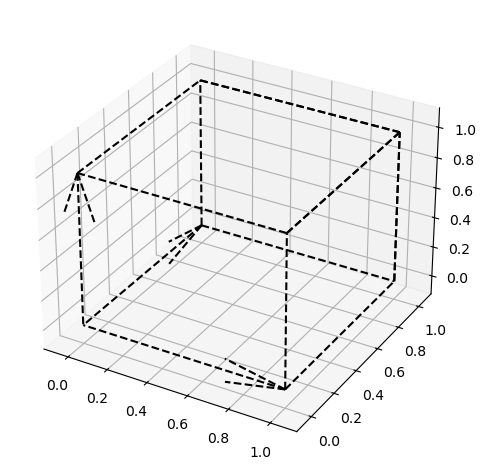

In [5]:
#Initializes a 3D simple cubic lattice.
latt= lp.Lattice.sc(a=1)
print("vectores base: ",latt.vectors)
latt.plot_cell()
plt.show()

Hasta ahora solo hemos definido los vectores base, para crear un reticulo necesitamos definir atomos

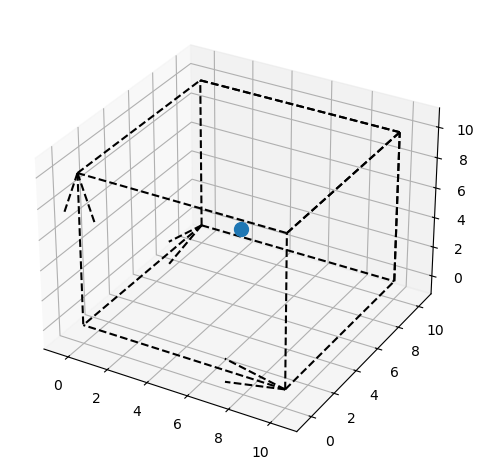

In [7]:
latt= lp.Lattice.sc(a=10)
latt.add_atom([5.0, 5.0, 5.0], "A")
latt.plot_cell()
plt.show()

Podemos modificar cuanto vemos de los ejex x,y,z (los vectores base no cambian)

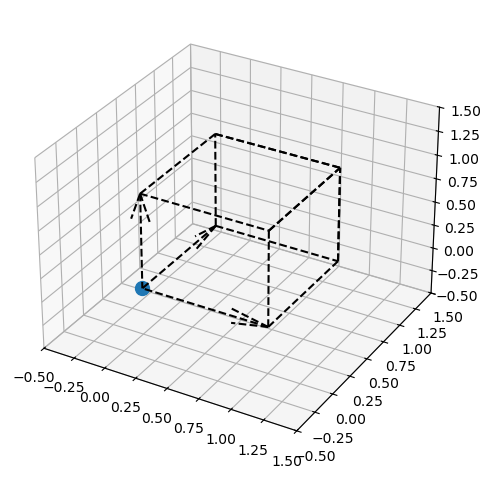

In [8]:
latt= lp.Lattice.sc(a=1)
latt.add_atom([0.0, 0.0,0.0], "A")
ax = latt.plot_cell()
ax.set_xlim(-0.5, 1.5)
ax.set_ylim(-0.5, 1.5)
ax.set_zlim(-0.5, 1.5)
plt.show()

### 3.2 Añadir conexiones

AÑADIR CONEXIONES:

Finalmente, las conexiones de los átomos con sus vecinos deben configurarse. LattPy conecta 
automáticamente los vecinos de los sitios hasta un nivel especificado de distancias entre vecinos, 
es decir, primeros vecinos, segundos vecinos, y así sucesivamente. La distancia máxima entre vecinos 
puede configurarse de manera independiente para cada par de átomos.
Por ejemplo, si se asume una red cubica con dos átomos A y B en la celda unitaria,
las conexiones entre los átomos A pueden configurarse hasta los segundos vecinos, 
mientras que las conexiones entre los átomos A y B pueden limitarse únicamente a los primeros vecinos.

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


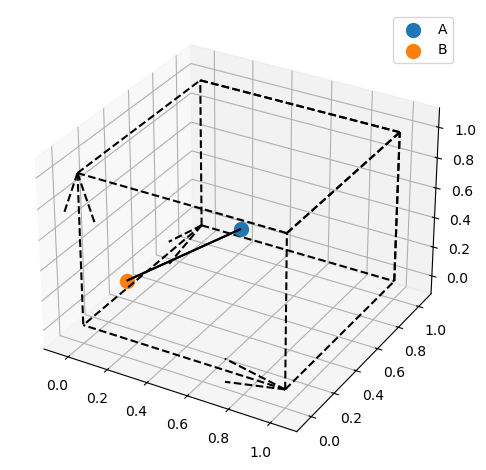

In [9]:
latt = lp.Lattice.sc(a=1)
latt.add_atom([0.50, 0.50, 0.50], "A")
latt.add_atom([0.1, 0.2, 0.2], "B")
#EN ESTE CASO A Y B SOLO SE CONECTARAN A 1 VECINO MAS CERCANO, EN ESTE CASO SON PARA A: B Y PARA B: A
latt.add_connection("A", "B", 1)
latt.analyze()
latt.plot_cell()
plt.show()

SI METEMOS UN NUEVO PUNTO C MAS CERCANO A "A" QUE "A" DE "B", ENTONCES QUEDARIA ASI

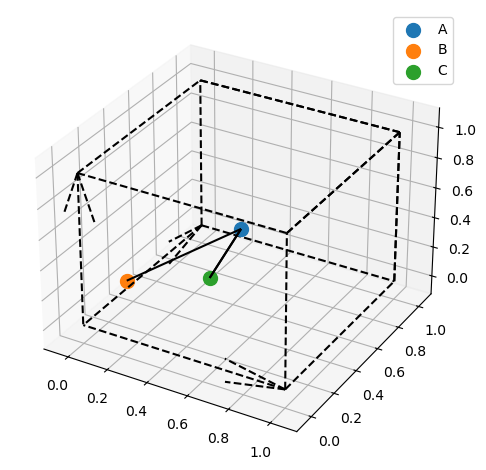

In [10]:
latt = lp.Lattice.sc(a=1)
latt.add_atom([0.50, 0.50, 0.50], "A")
latt.add_atom([0.1, 0.2, 0.2], "B")
latt.add_atom([0.4, 0.4 ,0.2], "C")

latt.add_connection("A", "B", 1)
latt.add_connection("A", "C", 1)
latt.analyze()
latt.plot_cell()
plt.show()

EN ESTE CASO SE CONECTAN EN LA PERIODICIDAD, PUES EL PUNTO PERIODICA MAS CERCANO ESTA MAS CERCA QUE EL PUNTO EN EL MISMO PERIODO

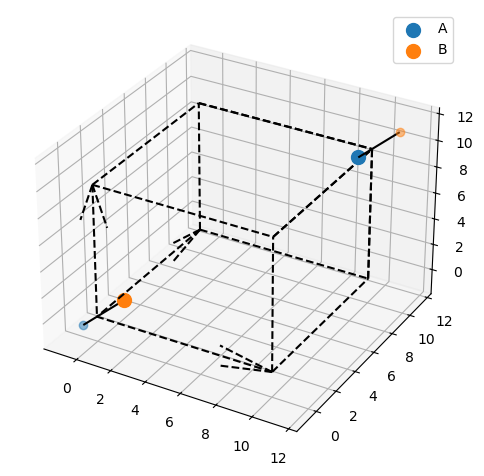

In [12]:
latt = lp.Lattice.sc(a=10)
latt.add_atom([9.50, 9.50, 9.50], "A")
latt.add_atom([1, 1, 1], "B")
latt.add_connection("A", "B", 1)
latt.analyze()
latt.plot_cell()
plt.show()

In [ ]:
 AQUI SERIA EQUIDISTANTE PUES A-B=5 Y A+10 -B = 5, COMO ES EQUIDISTANTE Y ESTA A LA MISMA DISTANCIA DE TODO, PUES 
 MOSTRARA TODAS LAS OPCIONES